In [5]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 23.9 MB/s 


In [1]:
import pandas as pd
import numpy as np

In [6]:
import pickle
import pgmpy

In [7]:
with open("../models/bayesian_18countries_learnt_bn_hill.pickle", "rb") as handle:
  model = pickle.load(handle)

In [8]:
train_df = pd.read_csv("../data/processed/train_18_countries.csv")
print(train_df.shape)
train_df.head()

(495, 325)


,cancel_public_events_germany,pi_campaign_germany,shn_requirement_israel,school_closures_united_states,cases_per_mil_china,restrict_public_gathering_united_states,debt_relief_india,vaccine_policy_malaysia,testing_policy_hong_kong,contact_tracing_china,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,1,2,0,2,66.598757,4,1.0,5,3.0,2.0,...,1,0,1,1,6,4,0,1,6,2
1,2,2,0,2,65.405387,4,1.0,4,3.0,2.0,...,1,0,1,1,5,2,0,1,5,2
2,2,2,0,2,68.002072,4,1.0,5,3.0,2.0,...,2,0,1,1,6,4,0,2,6,2
3,2,2,0,2,65.745166,4,1.0,4,3.0,2.0,...,1,0,1,1,6,3,0,1,6,2
4,2,2,0,2,72.752072,4,1.0,5,3.0,2.0,...,4,0,1,1,6,4,0,3,6,3


In [9]:
test_df = pd.read_csv("../data/processed/test_18_countries.csv")
print(test_df.shape)
test_df.head()

(165, 325)


,cancel_public_events_germany,pi_campaign_germany,shn_requirement_israel,school_closures_united_states,cases_per_mil_china,restrict_public_gathering_united_states,debt_relief_india,vaccine_policy_malaysia,testing_policy_hong_kong,contact_tracing_china,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,2,2,0,2,62.876381,4,1.0,4,3.0,2.0,...,1,0,0,1,4,1,0,1,5,1
1,2,2,0,2,62.264503,4,2.0,2,3.0,2.0,...,1,0,0,0,4,1,0,1,4,1
2,1,2,0,2,66.659530,4,1.0,5,3.0,2.0,...,1,0,1,1,6,4,0,1,6,2
3,2,2,2,3,57.348066,4,2.0,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,2,63.528315,3,1.0,4,3.0,2.0,...,1,0,0,1,4,1,0,1,5,2


In [10]:
from pgmpy.inference import VariableElimination

ve = VariableElimination(model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


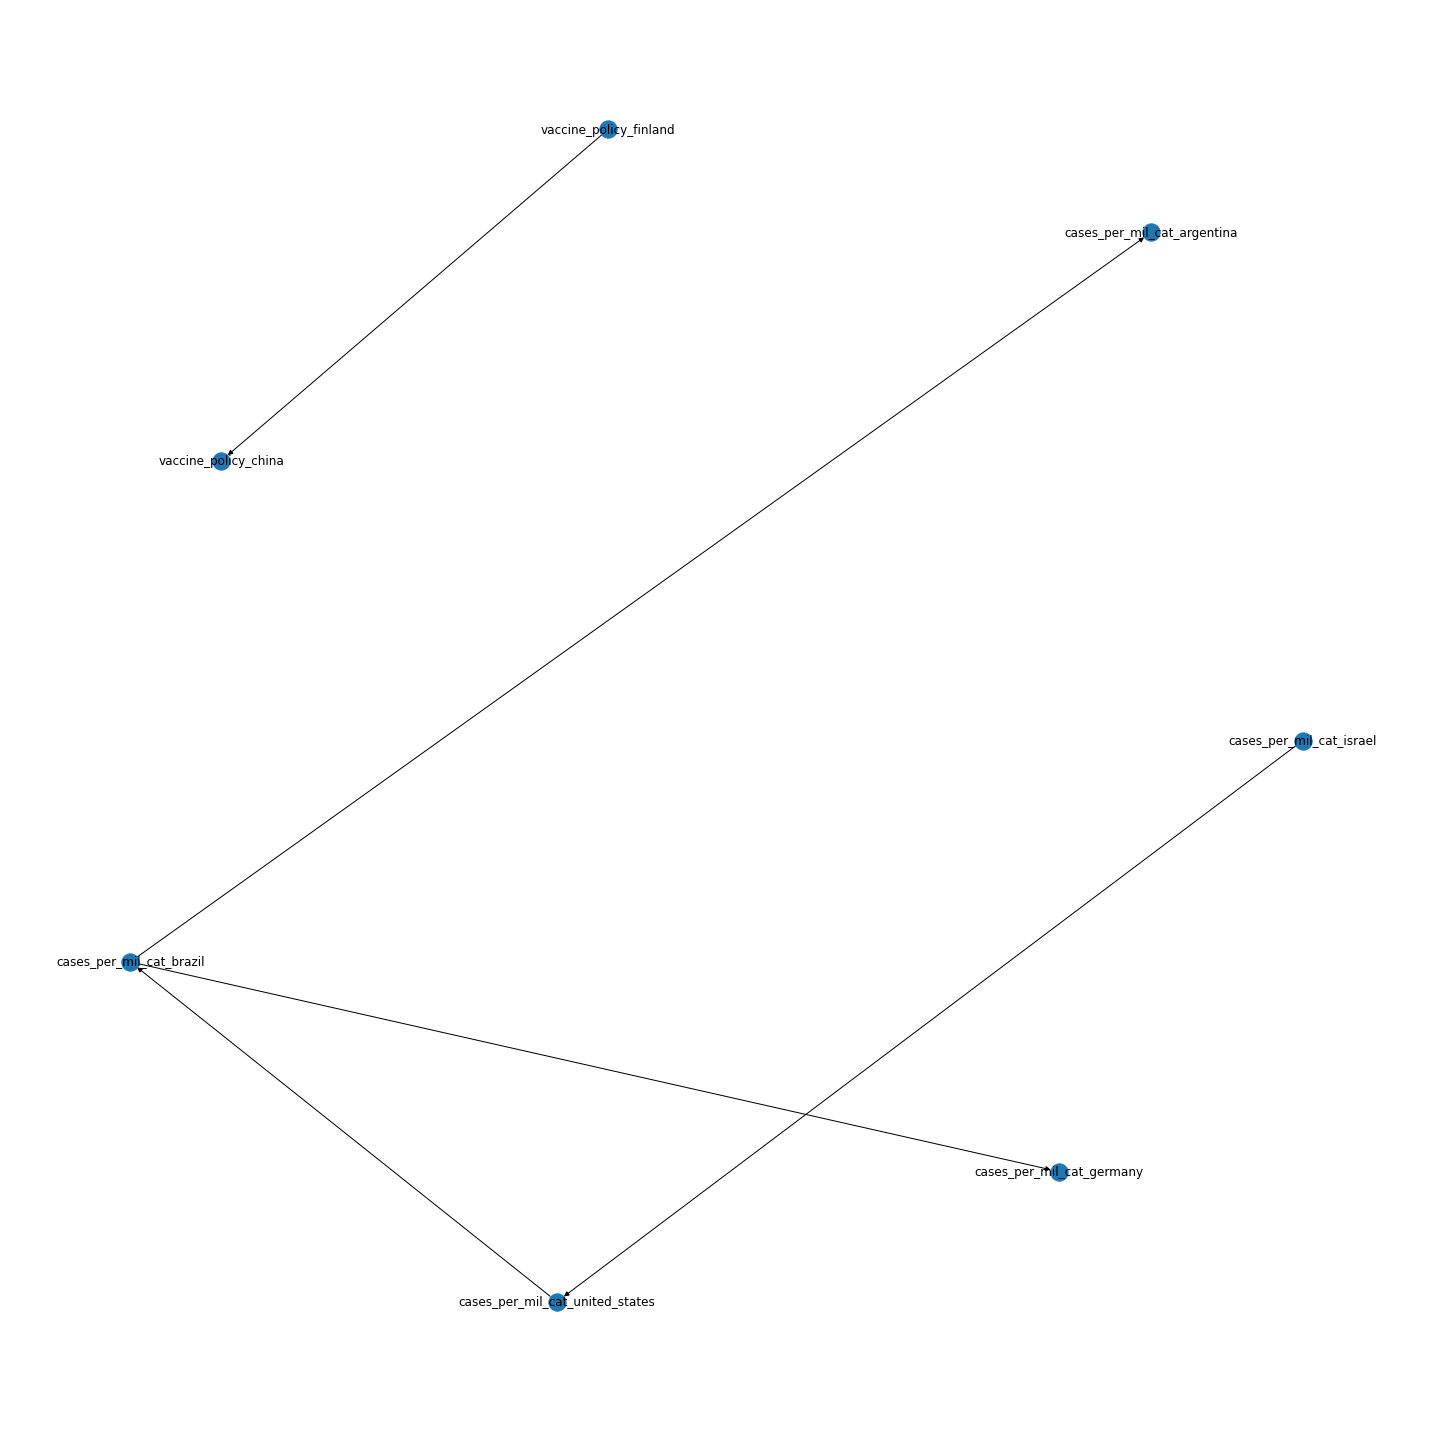

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20,20))
nx.draw(model, with_labels=True, ax=ax)
plt.tight_layout()

In [14]:
print(
    ve.query(
        ["vaccine_policy_china"], evidence={"vaccine_policy_finland": 1}
    )
)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------------------+-----------------------------+
| vaccine_policy_china    |   phi(vaccine_policy_china) |
+=========================+=============================+
| vaccine_policy_china(0) |                      0.0000 |
+-------------------------+-----------------------------+
| vaccine_policy_china(1) |                      1.0000 |
+-------------------------+-----------------------------+
| vaccine_policy_china(2) |                      0.0000 |
+-------------------------+-----------------------------+
| vaccine_policy_china(4) |                      0.0000 |
+-------------------------+-----------------------------+
| vaccine_policy_china(5) |                      0.0000 |
+-------------------------+-----------------------------+
